In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from scipy.stats import chi2_contingency
import plotly.graph_objects as go
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [2]:
df = pd.read_csv('BD\Supermercado.csv')

In [3]:
df.shape

(2019501, 12)

In [4]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [5]:
dias_semana = {
    0: 'Lunes',
    1: 'Martes',
    2: 'Miércoles',
    3: 'Jueves',
    4: 'Viernes',
    5: 'Sábado',
    6: 'Domingo'
}

df['dia'] = df['order_dow'].map(dias_semana)

df.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,department_id,department,product_name,dia
0,2425083,49125,1,2,18,NaN,17,1,0,13,pantry,baking ingredients,Miércoles
1,2425083,49125,1,2,18,NaN,91,2,0,16,dairy eggs,soy lactosefree,Miércoles
2,2425083,49125,1,2,18,NaN,36,3,0,16,dairy eggs,butter,Miércoles
3,2425083,49125,1,2,18,NaN,83,4,0,4,produce,fresh vegetables,Miércoles
4,2425083,49125,1,2,18,NaN,83,5,0,4,produce,fresh vegetables,Miércoles


#### Key del Dataset
order_id – (A unique number to identity the order)

user_id - (A unique number to identify the user)

order_number – (Number of the order)

order_dow – (Day of the Week the order was made)

order_hour_of_day – (Time of the order)

days_since_prior_order - (History of the order)

product_id – (Id of the product)

add_to_cart_order – (Number of items added to cart)

reordered – (If the reorder took place)

department_id - (Unique number allocated to each department)

department – (Names of the departments)

product_name – (Name of the products)


https://www.kaggle.com/datasets/hunter0007/ecommerce-dataset-for-predictive-marketing-2023/code

#### Info basica DF

In [6]:
df.head(5)

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,department_id,department,product_name,dia
0,2425083,49125,1,2,18,NaN,17,1,0,13,pantry,baking ingredients,Miércoles
1,2425083,49125,1,2,18,NaN,91,2,0,16,dairy eggs,soy lactosefree,Miércoles
2,2425083,49125,1,2,18,NaN,36,3,0,16,dairy eggs,butter,Miércoles
3,2425083,49125,1,2,18,NaN,83,4,0,4,produce,fresh vegetables,Miércoles
4,2425083,49125,1,2,18,NaN,83,5,0,4,produce,fresh vegetables,Miércoles


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2019501 entries, 0 to 2019500
Data columns (total 13 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   user_id                 int64  
 2   order_number            int64  
 3   order_dow               int64  
 4   order_hour_of_day       int64  
 5   days_since_prior_order  float64
 6   product_id              int64  
 7   add_to_cart_order       int64  
 8   reordered               int64  
 9   department_id           int64  
 10  department              object 
 11  product_name            object 
 12  dia                     object 
dtypes: float64(1), int64(9), object(3)
memory usage: 200.3+ MB


In [8]:
df.describe()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,department_id
count,2019501.00,2019501.00,2019501.00,2019501.00,2019501.00,1895159.00,2019501.00,2019501.00,2019501.00,2019501.00
mean,1707012.76,103067.27,17.15,2.74,13.44,11.39,71.21,8.36,0.59,9.93
std,985983.20,59491.17,17.53,2.09,4.24,8.97,38.21,7.15,0.49,6.28
min,10.00,2.00,1.00,0.00,0.00,0.00,1.00,1.00,0.00,1.00
25%,852649.00,51584.00,5.00,1.00,10.00,5.00,31.00,3.00,0.00,4.00
50%,1705004.00,102690.00,11.00,3.00,13.00,8.00,83.00,6.00,1.00,9.00
75%,2559031.00,154600.00,24.00,5.00,16.00,15.00,107.00,11.00,1.00,16.00
max,3421080.00,206209.00,100.00,6.00,23.00,30.00,134.00,137.00,1.00,21.00


In [9]:
print(df.describe())

        order_id    user_id  order_number  order_dow  order_hour_of_day  \
count 2019501.00 2019501.00    2019501.00 2019501.00         2019501.00   
mean  1707012.76  103067.27         17.15       2.74              13.44   
std    985983.20   59491.17         17.53       2.09               4.24   
min        10.00       2.00          1.00       0.00               0.00   
25%    852649.00   51584.00          5.00       1.00              10.00   
50%   1705004.00  102690.00         11.00       3.00              13.00   
75%   2559031.00  154600.00         24.00       5.00              16.00   
max   3421080.00  206209.00        100.00       6.00              23.00   

       days_since_prior_order  product_id  add_to_cart_order  reordered  \
count              1895159.00  2019501.00         2019501.00 2019501.00   
mean                    11.39       71.21               8.36       0.59   
std                      8.97       38.21               7.15       0.49   
min                     

In [10]:
df.isnull().sum()

order_id                       0
user_id                        0
order_number                   0
order_dow                      0
order_hour_of_day              0
days_since_prior_order    124342
product_id                     0
add_to_cart_order              0
reordered                      0
department_id                  0
department                     0
product_name                   0
dia                            0
dtype: int64

In [11]:
df['days_since_prior_order'].fillna(0, inplace=True)

In [12]:
df.isnull().sum()

order_id                  0
user_id                   0
order_number              0
order_dow                 0
order_hour_of_day         0
days_since_prior_order    0
product_id                0
add_to_cart_order         0
reordered                 0
department_id             0
department                0
product_name              0
dia                       0
dtype: int64

In [13]:
df.duplicated().sum()

0

In [14]:
df.nunique()

order_id                  200000
user_id                   105273
order_number                 100
order_dow                      7
order_hour_of_day             24
days_since_prior_order        31
product_id                   134
add_to_cart_order            137
reordered                      2
department_id                 21
department                    21
product_name                 134
dia                            7
dtype: int64

In [15]:
department_counts = df['department'].value_counts()
product_name_counts = df['product_name'].value_counts()

print("Department counts:\n", department_counts)
print("\nProduct name counts:\n", product_name_counts)

Department counts:
 department
produce            588996
dairy eggs         336915
snacks             180692
beverages          168126
frozen             139536
pantry             116262
bakery              72983
canned goods        66053
deli                65176
dry goods pasta     54054
household           46446
breakfast           44605
meat seafood        44271
personal care       28134
babies              25940
international       16738
alcohol              9439
pets                 6013
missing              4749
other                2240
bulk                 2133
Name: count, dtype: int64

Product name counts:
 product_name
fresh fruits                  226039
fresh vegetables              212611
packaged vegetables fruits    109596
yogurt                         90751
packaged cheese                61502
                               ...  
kitchen supplies                 561
baby bath body care              515
baby accessories                 504
beauty                      

#### Ventas segun Dia y Momento del Dia

In [16]:
df.groupby('order_hour_of_day', as_index=False).agg({'user_id':'count'}).sort_values(by='user_id', ascending=False)

,order_hour_of_day,user_id
10,10,173306
11,11,170291
14,14,167831
15,15,167157
13,13,166376
12,12,163511
16,16,158247
9,9,150248
17,17,129383
8,8,106754


array([<Axes: ylabel='count'>], dtype=object)

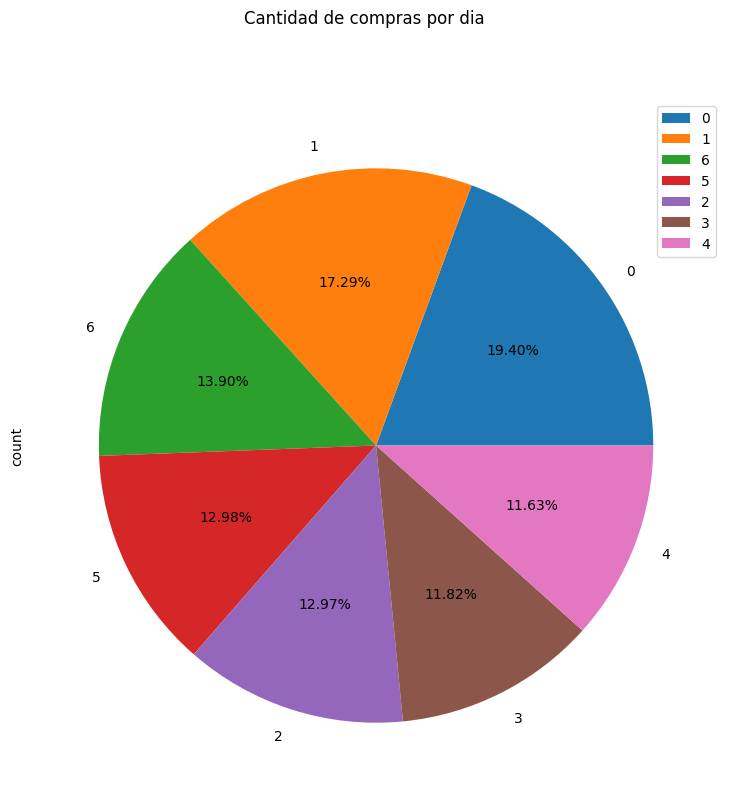

In [17]:
df.groupby('order_dow')['user_id'].agg(['count']).sort_values(by='count', ascending=False).plot(kind='pie', autopct='%1.2f%%', subplots=True,
                                                                                                title='Cantidad de compras por dia', figsize=(9, 9))

In [18]:
def order_time(x):
    if x in[6, 7, 8, 9, 10, 11, 12]:
        return 'Manana'
    if x in[13, 14, 15, 16, 17]:
        return 'Tarde'
    if x in[18, 19, 20, 21, 22]:
        return 'Noche'
    if x in[23, 24, 0, 1, 2, 3, 4, 5]:
        return 'Madrugada'
    return x

In [19]:
df['order_time_list']=df['order_hour_of_day'].apply(order_time)
df.sample(5)

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,department_id,department,product_name,dia,order_time_list
902424,546728,27634,14,5,11,30.00,53,4,0,16,dairy eggs,cream,Sábado,Manana
1687808,1195733,159057,28,4,14,7.00,31,4,1,7,beverages,refrigerated,Viernes,Tarde
826767,250696,55906,2,3,7,30.00,66,18,0,6,international,asian foods,Jueves,Manana
1098614,1784516,160348,2,1,10,1.00,123,10,1,4,produce,packaged vegetables fruits,Martes,Manana
300243,888064,186574,25,5,18,4.00,84,21,1,16,dairy eggs,milk,Sábado,Noche


<Axes: title={'center': 'Momento del dia en que se realizo la orden'}, xlabel='order_time_list'>

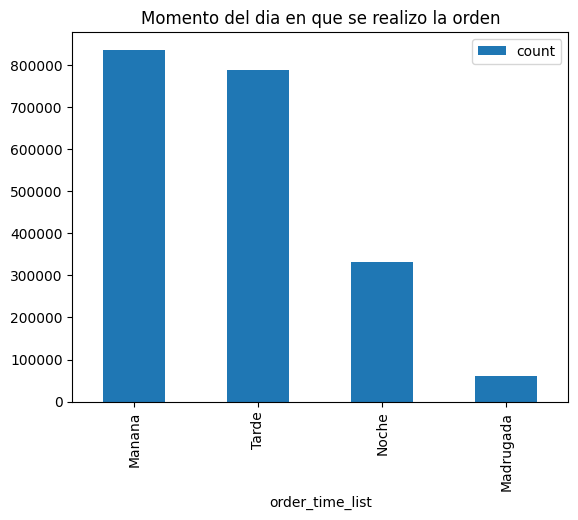

In [20]:
df.groupby('order_time_list')['user_id'].agg(['count']).sort_values(by='count', ascending=False).plot(kind='bar',
                                                                                                    title='Momento del dia en que se realizo la orden')

In [21]:
df.pivot_table(index='order_dow', columns='order_time_list', values='user_id', aggfunc=['count'])

count                       
order_time_list Madrugada  Manana  Noche   Tarde
order_dow                                       
0                   11157  157546  60195  162933
1                    8850  158356  51825  130205
2                    7926  108266  45497  100223
3                    7199   95722  41737   94072
4                    8017   92301  45359   89207
5                    8607  110126  42311  101113
6                    9544  114229  45737  111241

In [22]:
pivot_table = df.pivot_table(index='order_dow', columns='order_time_list', values='user_id', aggfunc='count')

correct_order = ['Madrugada', 'Manana', 'Tarde', 'Noche']

pivot_table = pivot_table[correct_order]

print(pivot_table)

order_time_list  Madrugada  Manana   Tarde  Noche
order_dow                                        
0                    11157  157546  162933  60195
1                     8850  158356  130205  51825
2                     7926  108266  100223  45497
3                     7199   95722   94072  41737
4                     8017   92301   89207  45359
5                     8607  110126  101113  42311
6                     9544  114229  111241  45737


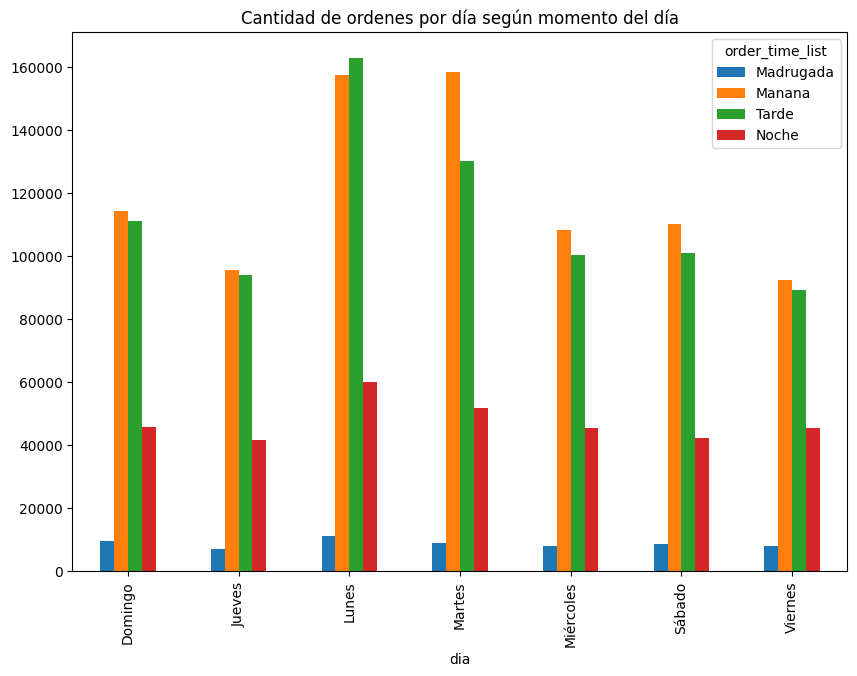

In [23]:
pivot_table = df.pivot_table(index='dia', columns='order_time_list', values='user_id', aggfunc='count')

ordered_columns = ['Madrugada', 'Manana', 'Tarde', 'Noche']
pivot_table = pivot_table.reindex(ordered_columns, axis=1)

pivot_table.plot(kind='bar', title='Cantidad de ordenes por día según momento del día', figsize=(10, 7))
plt.show()

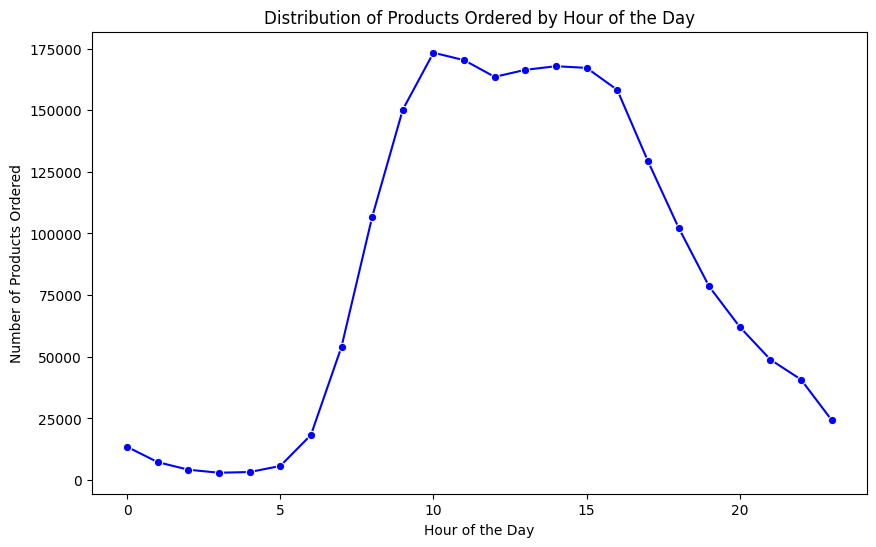

In [24]:
products_by_hour = df.groupby('order_hour_of_day')['product_id'].count().reset_index(name='order_count')

plt.figure(figsize=(10, 6))
sns.lineplot(x='order_hour_of_day', y='order_count', data=products_by_hour, marker='o', linestyle='-', color='b')

plt.title('Distribution of Products Ordered by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Products Ordered')

plt.show()

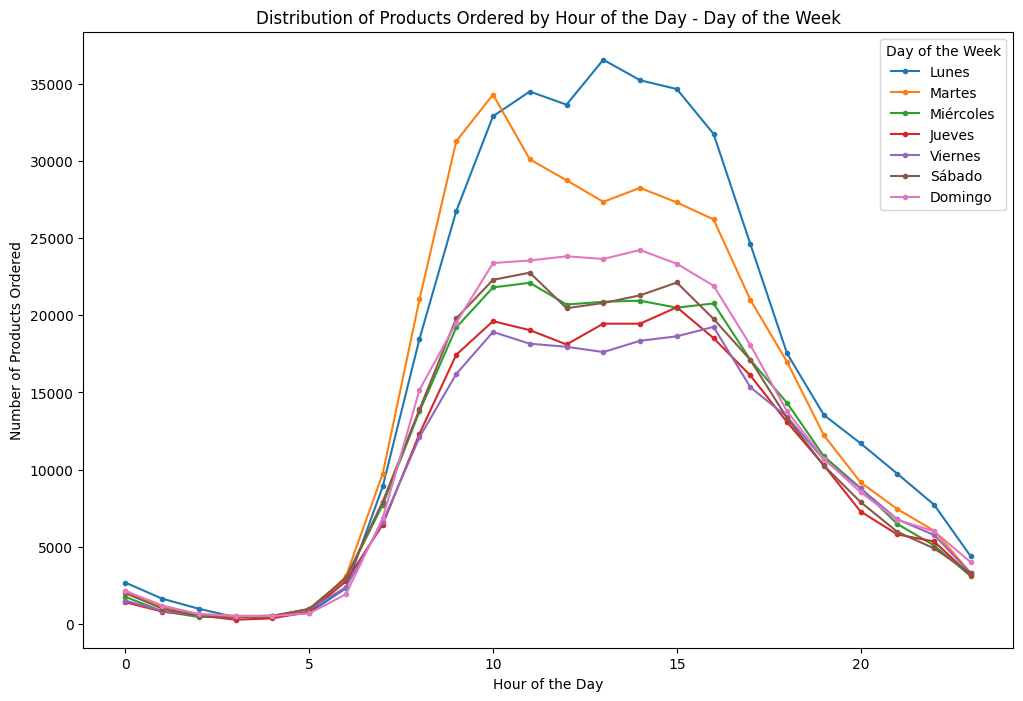

In [25]:
products_by_hour_dow = df.groupby(['dia', 'order_hour_of_day']).size().unstack()

plt.figure(figsize=(12, 8))

dias_semana = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']

for day in dias_semana: 
    plt.plot(products_by_hour_dow.loc[day], label=day, marker='o', markersize=3)

plt.title('Distribution of Products Ordered by Hour of the Day - Day of the Week')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Products Ordered')
plt.legend(title='Day of the Week', loc='upper right')

plt.show()

#### Top 10 de Productos Vendidos

In [26]:
Most_sold_product = df.groupby("product_name")[['add_to_cart_order']].sum().reset_index()
top_10_products = Most_sold_product.sort_values(ascending = False, by = 'add_to_cart_order').head(10)

In [27]:
top_10_products.columns
px.bar(top_10_products, x= 'product_name', y= 'add_to_cart_order',color = 'add_to_cart_order', color_continuous_scale=["gray", "skyblue" ,"blue"])

#### Productos mas Reordenados segun Departamento

In [28]:
df['reordered'].value_counts()

reordered
1    1190986
0     828515
Name: count, dtype: int64

<Axes: title={'center': 'Reordereds'}, ylabel='department'>

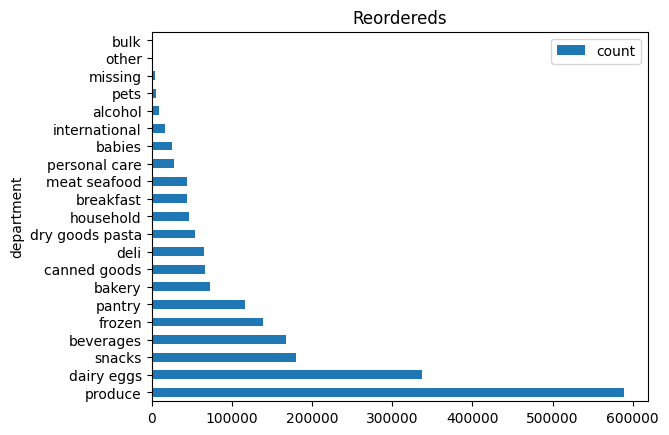

In [29]:
df.groupby('department')['reordered'].agg(['count']).sort_values(by='count', ascending=False).plot(kind='barh', title='Reordereds')

#### Segmentacion de Clientes por Cantidad de Ordenes

In [30]:
max_order_numbers = df.groupby('user_id')['order_number'].max().reset_index()
max_order_numbers.rename(columns={'order_number': 'max_order'}, inplace=True)

df = df.merge(max_order_numbers, on='user_id', how='left')

In [31]:
df.sample(10)

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,department_id,department,product_name,dia,order_time_list,max_order
1292944,1356508,86023,5,5,11,30.00,24,1,1,4,produce,fresh fruits,Sábado,Manana,5
1966619,1929513,25255,23,4,10,20.00,49,8,1,12,meat seafood,packaged poultry,Viernes,Manana,26
1787187,2915753,60862,19,0,11,23.00,24,8,1,4,produce,fresh fruits,Lunes,Manana,19
390969,859690,166028,19,1,9,2.00,112,3,1,3,bakery,bread,Martes,Manana,45
188604,2704226,148865,4,6,12,30.00,77,34,0,7,beverages,soft drinks,Domingo,Manana,4
1279440,324222,27886,2,6,9,28.00,61,7,0,19,snacks,cookies cakes,Domingo,Manana,2
1741144,2146630,12202,19,1,13,8.00,81,15,0,15,canned goods,canned jarred vegetables,Martes,Tarde,45
1528254,371202,117657,29,2,17,6.00,9,4,0,9,dry goods pasta,pasta sauce,Miércoles,Tarde,29
1203029,567932,61956,7,2,16,5.00,83,12,1,4,produce,fresh vegetables,Miércoles,Tarde,7
1957694,1828294,63423,29,6,9,8.00,84,3,1,16,dairy eggs,milk,Domingo,Manana,32


In [32]:
def order_number_group(x):
    if x <= 20:
        x = '1-20 order'
    elif x >20 and x <=40:
        x = '21-40 order'
    elif x >40 and x <=60:
        x = '41-60 order'
    elif x >60 and x <=80:
        x = '61-80 order'
    else:
        x = '81-100 order'
    return x

In [33]:
df['order_number_group']=df['max_order'].apply(order_number_group)
df.sample(5)

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,department_id,department,product_name,dia,order_time_list,max_order,order_number_group
941073,2919949,61777,20,0,6,7.00,120,16,1,16,dairy eggs,yogurt,Lunes,Manana,28,21-40 order
464095,1894254,53837,42,1,14,6.00,120,16,0,16,dairy eggs,yogurt,Martes,Tarde,58,41-60 order
454456,1466165,134817,7,4,18,5.00,93,7,1,3,bakery,breakfast bakery,Viernes,Noche,16,1-20 order
699640,2541493,55927,2,6,9,30.00,83,13,0,4,produce,fresh vegetables,Domingo,Manana,14,1-20 order
344005,1872235,168257,6,4,9,6.00,69,7,1,15,canned goods,soup broth bouillon,Viernes,Manana,6,1-20 order


array([<Axes: ylabel='count'>], dtype=object)

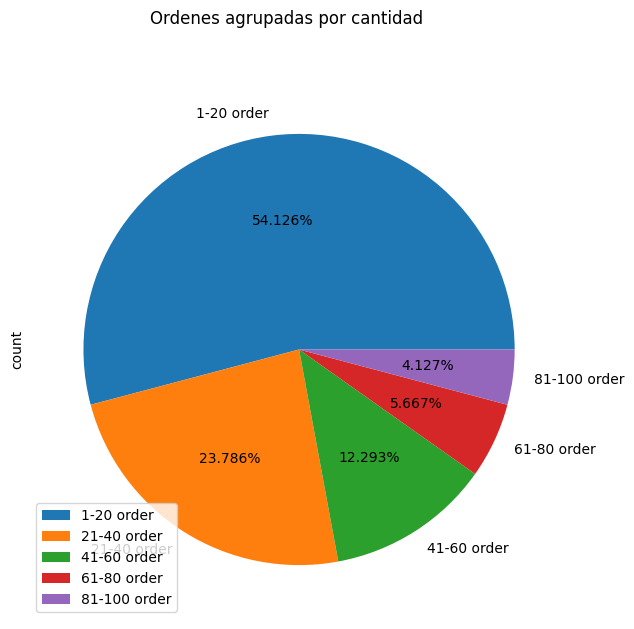

In [34]:
df.groupby('order_number_group')['user_id'].agg(['count']).sort_values(by='count', ascending=False).plot(kind='pie', autopct='%1.3f%%', subplots=True,
                                                                                                        title='Ordenes agrupadas por cantidad', figsize=(10, 7))

#### Correlacion

In [35]:
df2 = df.copy()

##### Correlación variables numericas

In [36]:
df2['department'] = pd.factorize(df.department)[0]
df2['product_name'] = pd.factorize(df.product_name)[0]
df2['order_time_list'] = pd.factorize(df.order_time_list)[0]
df2['order_number_group'] = pd.factorize(df.order_number_group)[0]
df2['dia'] = pd.factorize(df.order_number_group)[0]

In [37]:
df2.corr()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,department_id,department,product_name,dia,order_time_list,max_order,order_number_group
order_id,1.00,0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,0.00,0.00,-0.00,0.00,0.00,-0.00,0.01,0.00
user_id,0.00,1.00,-0.00,-0.00,-0.00,-0.00,0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00
order_number,0.00,-0.00,1.00,0.01,-0.04,-0.26,0.00,-0.00,0.30,0.00,-0.02,-0.03,0.40,0.03,0.76,0.40
order_dow,0.00,-0.00,0.01,1.00,0.01,-0.03,-0.00,-0.01,-0.01,0.00,0.01,0.01,0.01,-0.01,0.02,0.01
order_hour_of_day,0.00,-0.00,-0.04,0.01,1.00,0.00,-0.00,-0.02,-0.02,-0.01,0.00,0.00,-0.02,-0.81,-0.04,-0.02
days_since_prior_order,-0.00,-0.00,-0.26,-0.03,0.00,1.00,0.01,0.05,-0.03,0.00,0.01,0.01,-0.19,-0.00,-0.37,-0.19
product_id,0.00,0.00,0.00,-0.00,-0.00,0.01,1.00,0.01,0.00,0.06,-0.01,0.01,-0.00,-0.00,-0.00,-0.00
add_to_cart_order,-0.00,0.00,-0.00,-0.01,-0.02,0.05,0.01,1.00,-0.13,0.03,0.04,0.07,-0.01,0.02,-0.01,-0.01
reordered,0.00,-0.00,0.30,-0.01,-0.02,-0.03,0.00,-0.13,1.00,-0.04,-0.06,-0.12,0.10,0.02,0.26,0.10
department_id,0.00,0.00,0.00,0.00,-0.01,0.00,0.06,0.03,-0.04,1.00,0.25,0.18,0.00,0.01,0.00,0.00


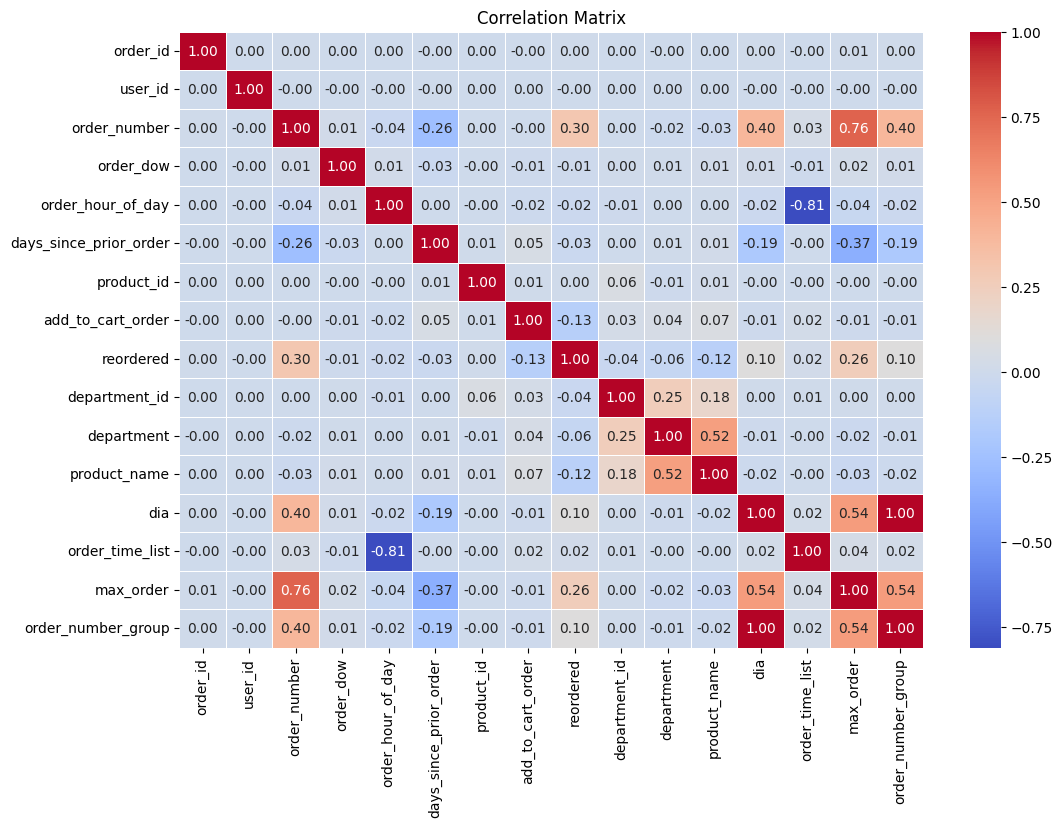

In [38]:
corr_matrix = df2.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

##### Correlación de variables categoricas

In [39]:
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    r, k = confusion_matrix.shape
    return np.sqrt(chi2 / (n * (min(r, k) - 1)))

categorical_columns = ['department', 'product_name', 'dia', 'order_time_list', 'order_number_group']

cramers_v_matrix = pd.DataFrame(np.zeros((len(categorical_columns), len(categorical_columns))),
                                index=categorical_columns, columns=categorical_columns)

for col1 in categorical_columns:
    for col2 in categorical_columns:
        cramers_v_matrix.loc[col1, col2] = cramers_v(df[col1], df[col2])

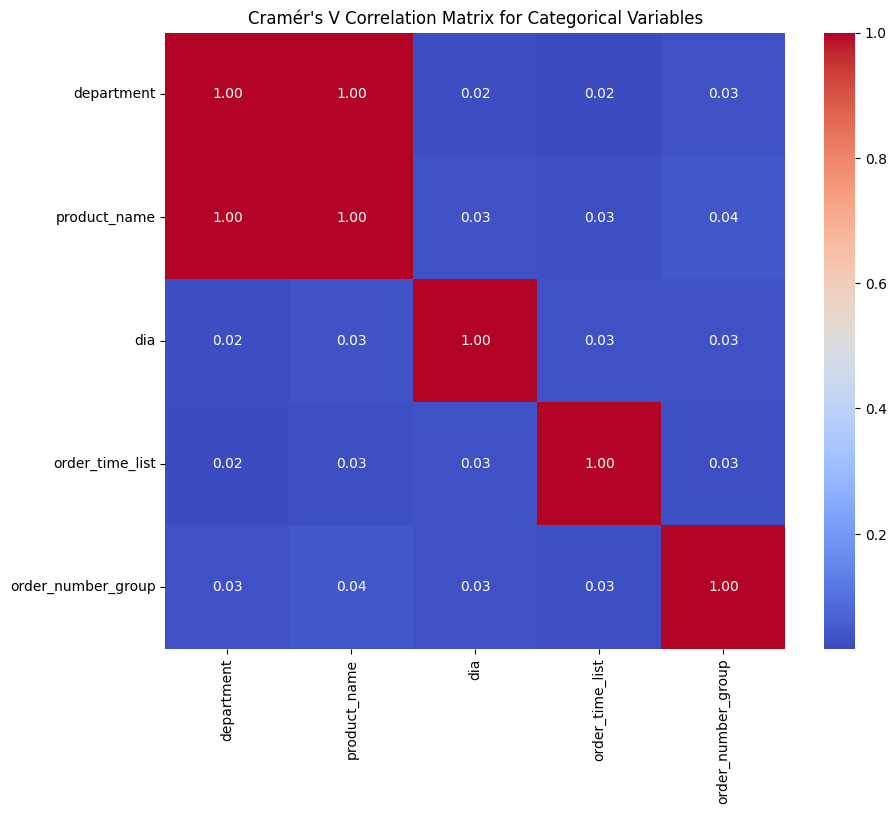

In [40]:
plt.figure(figsize=(10,8))
sns.heatmap(cramers_v_matrix, annot=True, cmap="coolwarm", fmt='.2f')
plt.title("Cramér's V Correlation Matrix for Categorical Variables")
plt.show()

##### Pares de productos comprados juntos

C:\Users\marti\AppData\Local\Temp\ipykernel_37164\1648073766.py:15: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




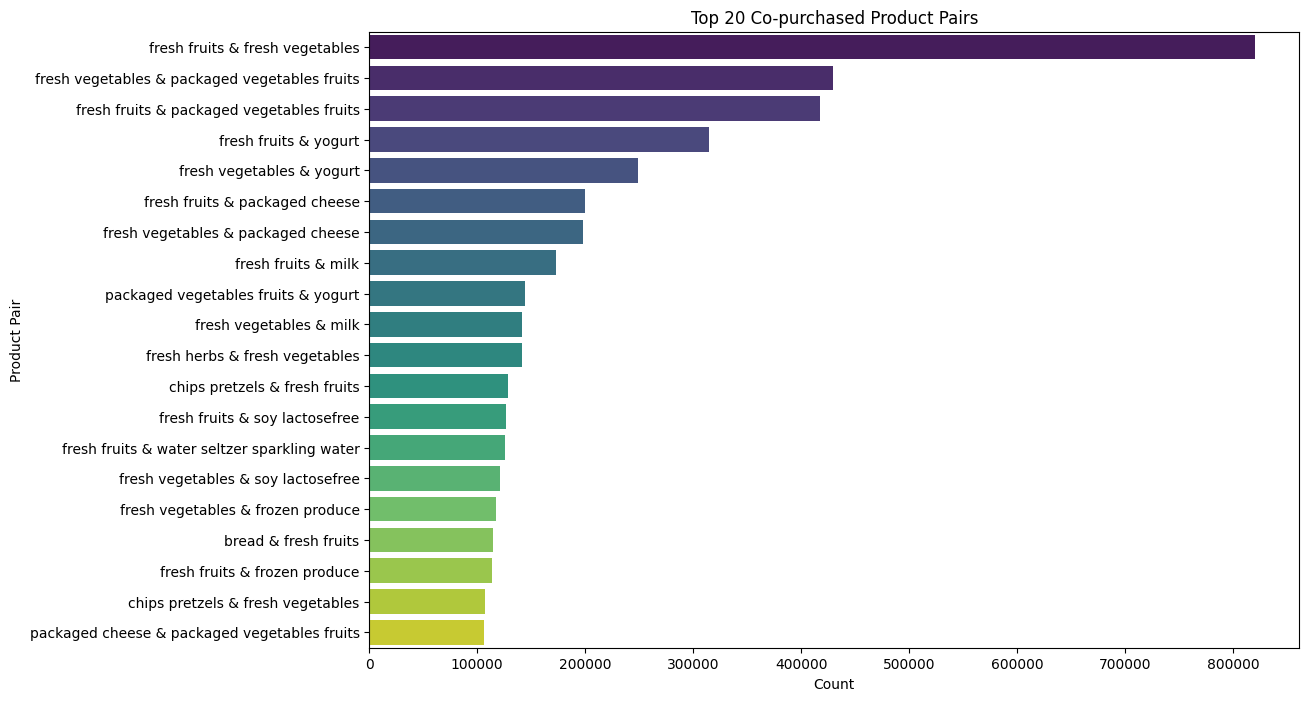

In [41]:
order_products = df[['order_id', 'product_name']]

merged_products = pd.merge(order_products, order_products, on='order_id')

co_purchased_products = merged_products[merged_products['product_name_x'] != merged_products['product_name_y']][['product_name_x', 'product_name_y']]

co_purchased_products['min_product'] = co_purchased_products[['product_name_x', 'product_name_y']].min(axis=1)
co_purchased_products['max_product'] = co_purchased_products[['product_name_x', 'product_name_y']].max(axis=1)

unique_pairs = co_purchased_products[['min_product', 'max_product']].value_counts().reset_index(name='count')

top_pairs = unique_pairs.head(20)

plt.figure(figsize=(12, 8))
sns.barplot(x='count', y=top_pairs['min_product'].astype(str) + ' & ' + top_pairs['max_product'].astype(str), data=top_pairs, palette='viridis')
plt.title('Top 20 Co-purchased Product Pairs')
plt.xlabel('Count')
plt.ylabel('Product Pair')
plt.show()

#### Outliers

In [42]:
product_counts = df['product_name'].value_counts()

low_percentile_freq = product_counts.quantile(0.05)
high_percentile_freq = product_counts.quantile(0.95)

low_freq_products = product_counts[product_counts <= low_percentile_freq]
high_freq_products = product_counts[product_counts >= high_percentile_freq]

print("Productos en el 5% más bajo de frecuencia:")
print(low_freq_products)

print("\nProductos en el 5% más alto de frecuencia:")
print(high_freq_products)


Productos en el 5% más bajo de frecuencia:
product_name
specialty wines champagnes    614
eye ear care                  598
kitchen supplies              561
baby bath body care           515
baby accessories              504
beauty                        387
frozen juice                  279
Name: count, dtype: int64

Productos en el 5% más alto de frecuencia:
product_name
fresh fruits                     226039
fresh vegetables                 212611
packaged vegetables fruits       109596
yogurt                            90751
packaged cheese                   61502
milk                              55150
water seltzer sparkling water     52564
Name: count, dtype: int64


In [43]:
product_counts = df['department'].value_counts()

low_percentile_freq = product_counts.quantile(0.05)
high_percentile_freq = product_counts.quantile(0.95)

low_freq_products = product_counts[product_counts <= low_percentile_freq]
high_freq_products = product_counts[product_counts >= high_percentile_freq]

print("Departments en el 5% más bajo de frecuencia:")
print(low_freq_products)

print("\nDepartments en el 5% más alto de frecuencia:")
print(high_freq_products)

Departments en el 5% más bajo de frecuencia:
department
other    2240
bulk     2133
Name: count, dtype: int64

Departments en el 5% más alto de frecuencia:
department
produce       588996
dairy eggs    336915
Name: count, dtype: int64


In [44]:
product_counts = df['max_order'].value_counts()

low_percentile_freq = product_counts.quantile(0.05)
high_percentile_freq = product_counts.quantile(0.95)

low_freq_products = product_counts[product_counts <= low_percentile_freq]
high_freq_products = product_counts[product_counts >= high_percentile_freq]

print("Conteo de pedidos por usuario en el 5% más bajo de frecuencia:")
print(low_freq_products)

print("\nConteo de pedidos por usuario en el 5% más alto de frecuencia:")
print(high_freq_products)

Conteo de pedidos por usuario en el 5% más bajo de frecuencia:
max_order
89     3509
92     3468
84     3254
91     3214
100    3193
Name: count, dtype: int64

Conteo de pedidos por usuario en el 5% más alto de frecuencia:
max_order
4    84329
3    78848
5    76413
2    70941
6    68471
Name: count, dtype: int64


In [45]:
product_counts = df['order_hour_of_day'].value_counts()

low_percentile_freq = product_counts.quantile(0.05)
high_percentile_freq = product_counts.quantile(0.95)

low_freq_products = product_counts[product_counts <= low_percentile_freq]
high_freq_products = product_counts[product_counts >= high_percentile_freq]

print("Horas del dia en el 5% más bajo de frecuencia:")
print(low_freq_products)

print("\nHoras del dia en el 5% más alto de frecuencia:")
print(high_freq_products)

Horas del dia en el 5% más bajo de frecuencia:
order_hour_of_day
4    3269
3    2994
Name: count, dtype: int64

Horas del dia en el 5% más alto de frecuencia:
order_hour_of_day
10    173306
11    170291
Name: count, dtype: int64


#### CLUSTERING

c:\Users\marti\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\marti\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\marti\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\marti\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the w

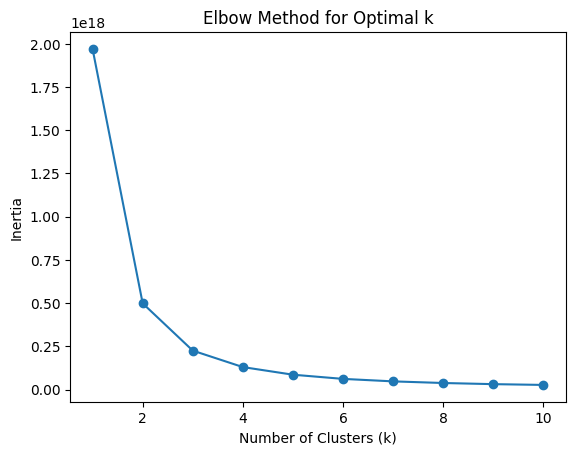

In [46]:
X = df[['order_id', 'user_id', 'max_order', 'order_dow', 'order_hour_of_day', 'days_since_prior_order', 'product_id', 'add_to_cart_order', 'reordered', 'department_id']]

inertia_values = []

for n_clusters in range(1, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X)
    inertia_values.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia_values, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

c:\Users\marti\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\marti\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning:

Creating legend with loc="best" can be slow with large amounts of data.



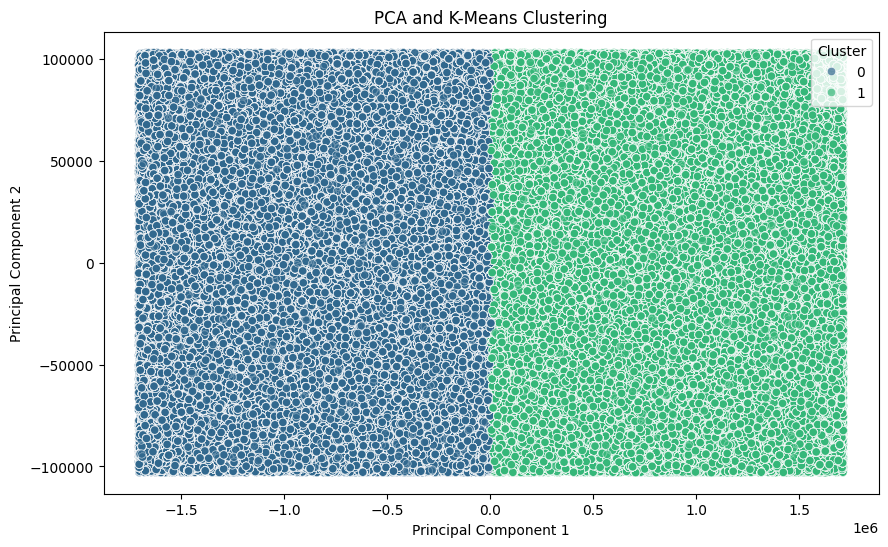

In [47]:
n_clusters = 2

kmeans = KMeans(n_clusters=n_clusters, random_state=100)
labels = kmeans.fit_predict(X)

pca = PCA(n_components=2)
principal_components = pca.fit_transform(X)

df_c1 = pd.DataFrame(principal_components, columns=['PC1', 'PC2'])
df_c1['Cluster'] = labels

plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=df_c1, palette='viridis', alpha=0.7)
plt.title('PCA and K-Means Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

c:\Users\marti\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\marti\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning:

Creating legend with loc="best" can be slow with large amounts of data.



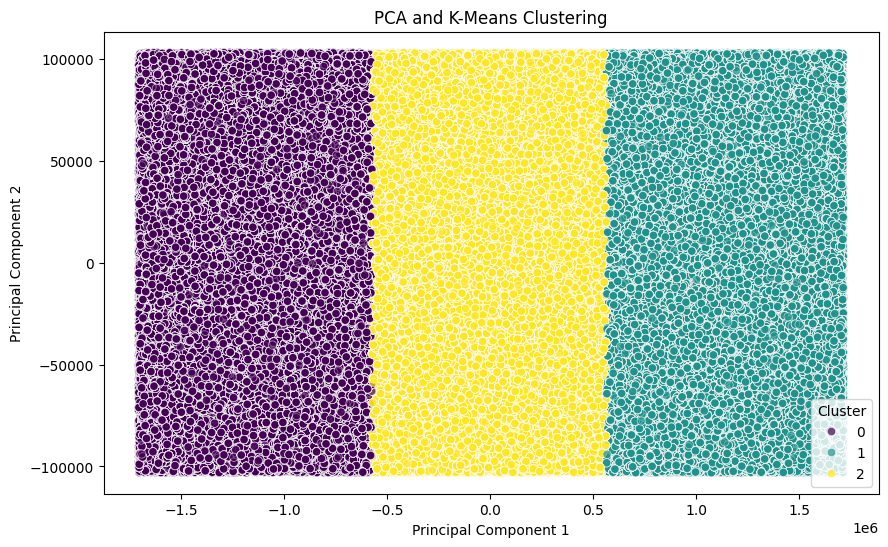

In [48]:
n_clusters = 3

kmeans = KMeans(n_clusters=n_clusters, random_state=100)
labels = kmeans.fit_predict(X)

pca = PCA(n_components=2)
principal_components = pca.fit_transform(X)

df_c2 = pd.DataFrame(principal_components, columns=['PC1', 'PC2'])
df_c2['Cluster'] = labels

plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=df_c2, palette='viridis', alpha=0.7)
plt.title('PCA and K-Means Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

##### Clusterización en base a Department_id

In [49]:
clst_prd = pd.crosstab(df['user_id'], df['department'])
clst_prd

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,...,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
user_id,,,,,,,,,,,,,,,,,,,,,
2,0,0,0,0,0,0,0,2,3,0,...,0,0,0,0,0,0,0,0,3,3
3,0,0,0,1,0,0,0,5,0,0,...,1,0,0,0,0,1,0,0,6,3
7,0,0,1,7,0,0,2,4,3,0,...,0,0,1,0,0,0,0,0,2,3
10,0,0,0,0,0,0,0,5,4,0,...,0,0,4,0,0,4,0,0,13,0
11,0,0,0,3,0,0,0,2,0,0,...,0,0,0,0,0,4,0,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206204,0,0,1,0,0,0,0,6,0,2,...,0,0,1,0,0,0,0,1,4,0
206205,0,0,1,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,3,0
206206,0,0,0,2,0,0,0,1,1,0,...,0,1,1,0,0,0,0,0,1,4


In [50]:
X_train = clst_prd.values

kmeans = KMeans(n_clusters=6, random_state=540)
kmeans = kmeans.fit(X_train)

print("The cluster are  :", kmeans.labels_)

print("The Inertia is :", kmeans.inertia_)

c:\Users\marti\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



The cluster are  : [0 5 4 ... 0 5 4]
The Inertia is : 4996208.424404032


In [51]:
no_of_clusters = range(2,10)
inertia =[]

for f in no_of_clusters:
    kmeans = KMeans(n_clusters=f, random_state=540)
    kmeans = kmeans.fit(X_train)
    u = kmeans.inertia_
    inertia.append(u)
    print("The inertia for :", f , "Cluster is : " , u)

c:\Users\marti\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



The inertia for : 2 Cluster is :  7543563.039322978


c:\Users\marti\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



The inertia for : 3 Cluster is :  6284974.785130063


c:\Users\marti\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



The inertia for : 4 Cluster is :  5731891.172768629


c:\Users\marti\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



The inertia for : 5 Cluster is :  5281387.58183091


c:\Users\marti\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



The inertia for : 6 Cluster is :  4996208.424404032


c:\Users\marti\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



The inertia for : 7 Cluster is :  4763193.064231271


c:\Users\marti\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



The inertia for : 8 Cluster is :  4586277.708068179


c:\Users\marti\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



The inertia for : 9 Cluster is :  4435260.131165755


Text(0.5, 1.0, 'Inertia Plot per k')

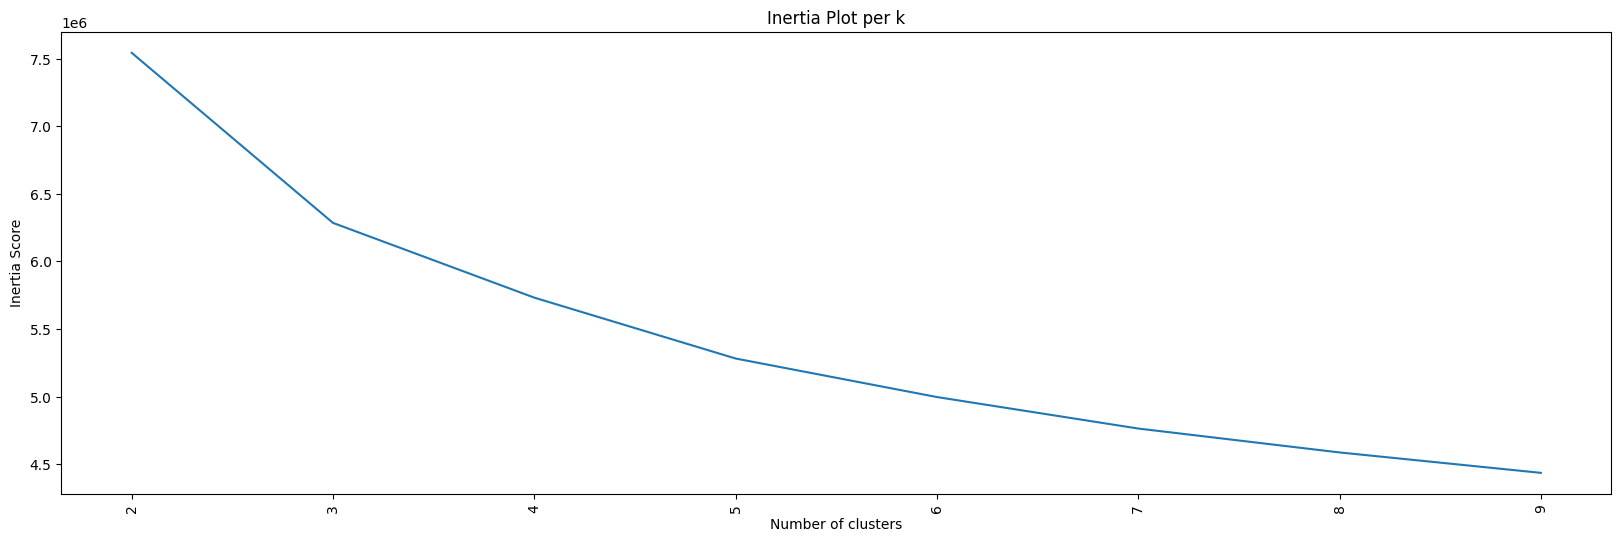

In [52]:
fig, (ax1) = plt.subplots(1, figsize =(20,6))
xx = np.arange(len(no_of_clusters))
ax1.plot(xx, inertia)
ax1.set_xticks(xx)
ax1.set_xticklabels(no_of_clusters, rotation ="vertical")
plt.xlabel("Number of clusters")
plt.ylabel("Inertia Score")
plt.title("Inertia Plot per k")

In [53]:
kmeans = KMeans(n_clusters=5, random_state=2)
kmeans = kmeans.fit(X_train)

kmeans.labels_

predictions = kmeans.predict(X_train)

unique , counts = np.unique(predictions, return_counts=True)
counts = counts.reshape(1,5)

countscldf = pd.DataFrame(counts, columns=["Cluster 0 ", "Cluster 1" , "Cluster 2", "Cluster 3", "Cluster 4"])

countscldf

c:\Users\marti\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



,Cluster 0,Cluster 1,Cluster 2,Cluster 3,Cluster 4
0,8043,62798,6184,1927,26321


In [54]:
kmeans.labels_

array([1, 4, 1, ..., 1, 4, 1])

In [55]:
predictions

array([1, 4, 1, ..., 1, 4, 1])

Explained variance ratio (first two components): [0.59064731 0.1373943 ]


<Figure size 640x480 with 0 Axes>

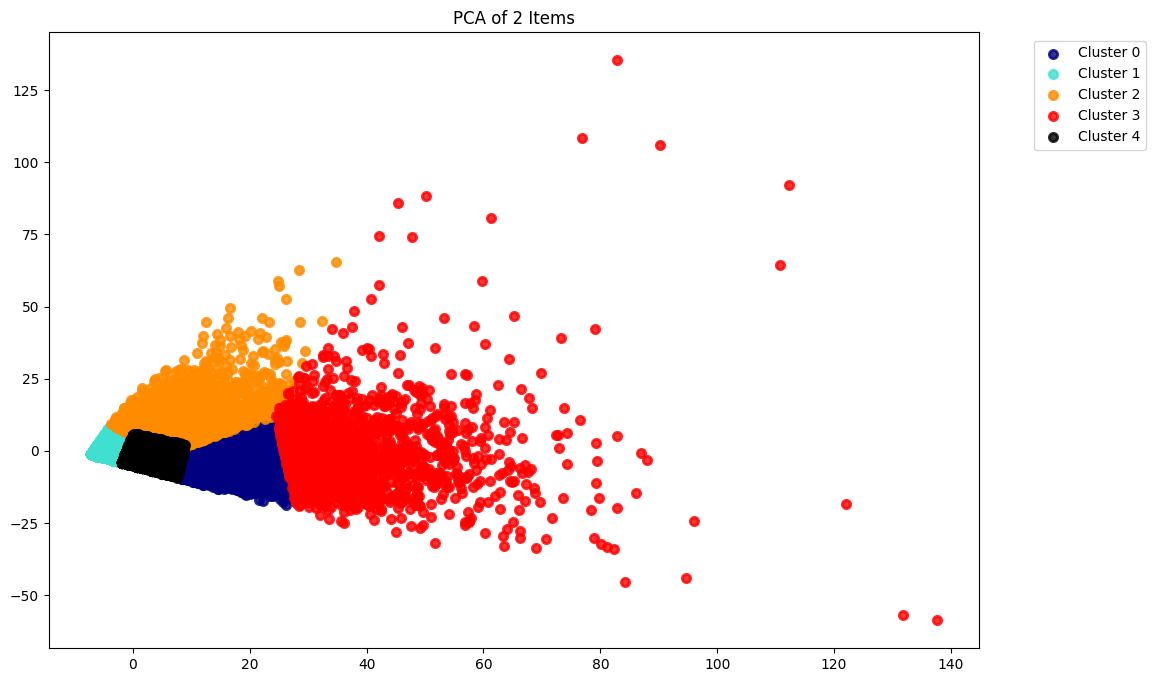

In [56]:
X = X_train
y_num = predictions

target_names = ["Cluster 0","Cluster 1","Cluster 2", "Cluster 3","Cluster 4"]

pca = PCA(n_components=2, random_state = 453)
X_r = pca.fit(X).transform(X)

print('Explained variance ratio (first two components): %s' % str(pca.explained_variance_ratio_))

plt.figure()
plt.figure(figsize=(12,8))
colors = ['navy', 'turquoise', 'darkorange', 'red', 'black']
lw = 2


for color, i, target_name in zip(colors, [0, 1, 2, 3,4], target_names):
    plt.scatter(X_r[y_num == i, 0], X_r[y_num == i, 1], color=color, alpha=.8, lw=lw,label=target_name)
    
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.6)   
plt.title('PCA of 2 Items')
plt.show()